# Computer Vision Assignment # 1 
Prepared by : Saeed Ahmad
Reg # : 362002

#### Reading Data from Drive

In [53]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [54]:
cd drive/MyDrive/


[Errno 107] Transport endpoint is not connected: 'drive/MyDrive/'
/content/drive/MyDrive


In [55]:
import cv2
import numpy as np
import pandas as pd
import os
import sklearn
from skimage.feature import hog

In [56]:
from google.colab.patches import cv2_imshow

#### A sample Image

In [57]:
directory = "/content/drive/MyDrive/Assignment Data"
classes  = os.listdir(directory)

####  Function Defination to split Data into seperate train and test folders within the class folders

In [58]:
import shutil
def train_test_split(classes):
  for dir in classes:
    class_dir = os.path.join(directory, dir)
    test_txt_path = os.path.join(class_dir, "test.txt")
    train_dir = os.path.join(class_dir, "train")
    test_dir = os.path.join(class_dir, "test")
    if  not os.path.isdir(train_dir):
      os.mkdir(train_dir)
    if  not os.path.isdir(test_dir):
      os.mkdir(test_dir)
    with open(test_txt_path, "r") as f:
      lines = f.readlines()
    for img in os.listdir(class_dir):
      img_path = os.path.join(class_dir, img)
      x = img + "\n"
      if x in lines:
        if os.path.isfile(img_path):
          shutil.copy(img_path, os.path.join(test_dir, img))
      else:
        if os.path.isfile(img_path):
          shutil.copy(img_path, os.path.join(train_dir, img))

### Random Samples from the dataset

In [62]:
import random
sample_images  = []
directory1 = directory
classes  = os.listdir(directory1)
for clas in  classes:
  sample_images.append(directory1+'/'+clas+'/'+random.choice(os.listdir(os.path.join(directory1, clas))))
  sample_images.append(directory1+'/'+clas+'/'+random.choice(os.listdir(os.path.join(directory1, clas))))


In [63]:
sample_images

['/content/drive/MyDrive/Assignment Data/00003/01817_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00003/01773_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00005/00112_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00005/00048_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00001/01103_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00001/00468_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00008/00462_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00008/00393_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00004/01061_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00004/00719_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00006/00981_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00006/01928_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00010/00819_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00010/01177_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00009/00955_00002.ppm',
 '/content/drive/MyDrive/

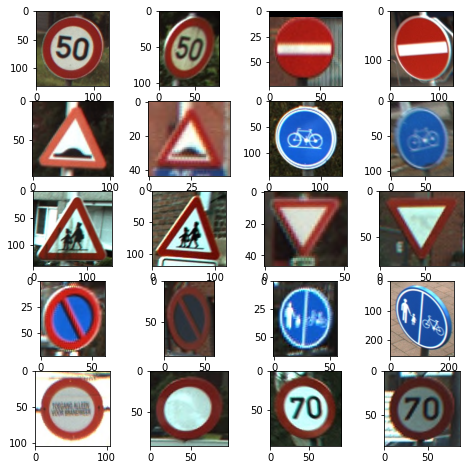

In [64]:
import random
import matplotlib.pyplot as plt
fig=plt.figure(figsize= (8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_path = sample_images[i-1]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#### Function defination of extracting image features using Histogram of Oriented Gradients

In [67]:
def feature_extraction_HOG(direct):
  features = []
  labels = []
  hog_images = []
  image_names = []
  directory2 = directory
  classes  = os.listdir(directory2)
  for dir in classes:
    class_dir = os.path.join(directory2, dir)
    tr_dir = os.path.join(class_dir, direct)
    for img in os.listdir(tr_dir):
      img_path = os.path.join(tr_dir, img)
      img1 = cv2.imread(img_path)
      
      if img1 is not None:
        img1 = cv2.resize(img1, (50, 60))
        fd, hog_image = hog(img1, orientations=8, pixels_per_cell=(8, 8),
                      cells_per_block=(1, 1), visualize=True)
        features.append(fd)
        image_names.append(img)
        labels.append(int(dir))
        hog_images.append(hog_image)
      else:
        print(f"Cannot Read the Image from Path {img_path}")
  return features, labels, hog_images, image_names

    


#### Extracting Train and Test data features

In [68]:
train_features_hog, train_labels_hog, train_hog_images, trian_image_names = feature_extraction_HOG("train")
test_features_hog, test_labels_hog, _ , test_image_names= feature_extraction_HOG("test")

Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00003/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00003/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00005/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00005/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00001/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00001/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00008/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00008/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00004/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00004/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/0000

## Supervised Paradigm

##### Visualizing HOG  (Histogram of Oriented Gradients)

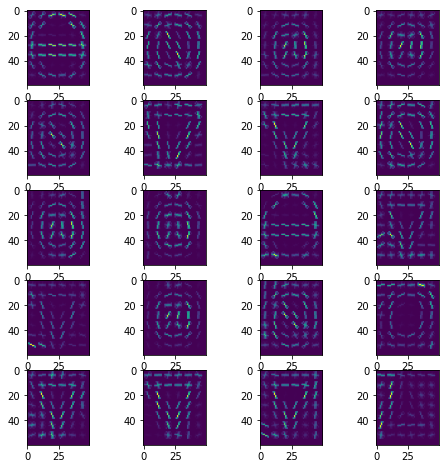

In [69]:
import random
import matplotlib.pyplot as plt
fig=plt.figure(figsize= (8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_hog_images[random.randint(0,800)]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#### Random Forest Classifier


In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30)
clf.fit(np.array(np.array(train_features_hog)), train_labels_hog)

RandomForestClassifier(n_estimators=30)

#### SVM Classifier

In [71]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_features_hog, train_labels_hog)

SVC()

In [72]:
svc.score(np.array(test_features_hog), test_labels_hog)

0.995

In [73]:
clf.score(np.array(test_features_hog), test_labels_hog)

0.995

In [74]:
predictions = svc.predict(test_features_hog)
indices = []
for i in range(len(test_labels_hog)):
    if int(test_labels_hog[i]) != int(predictions[i]):
      indices.append(i)
test_image_names[indices[0]]

'00377_00000.ppm'

### Images Misclassified by SVM

In [75]:
predictions = clf.predict(test_features_hog)
indices = []
for i in range(len(test_labels_hog)):
    if int(test_labels_hog[i]) != int(predictions[i]):
      indices.append(i)
# test_image_names[indices[0]]

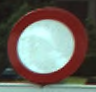

In [76]:
img = cv2.imread("/content/drive/MyDrive/Assignment Data/00007/00019_00001.ppm")
cv2_imshow(img)

#### Score/Metrics for SVM Classifier on test data

In [77]:
from sklearn.metrics import classification_report
print(classification_report(svc.predict(test_features_hog), test_labels_hog))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



#### Score/Metrics for Random Forest Classifier on test data

In [78]:
print(classification_report(clf.predict(test_features_hog), test_labels_hog))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



## Unsupervised Paradigm


## KMeans Clustering

In [79]:
from sklearn.cluster import KMeans

In [80]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(train_features_hog)
    distortions.append(kmeanModel.inertia_)

### Elbow Curve

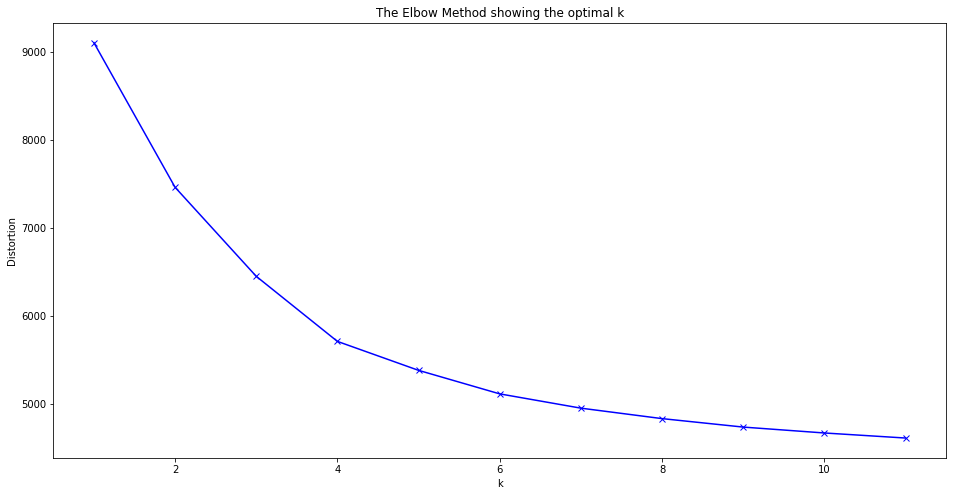

In [81]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silleuotte Score for Different K in K means

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    s = silhouette_score(train_features_hog, kmeanModel.fit_predict(train_features_hog))
    print(f"The silhouette socre for k = {k} is {s}")



The silhouette socre for k = 2 is 0.21669926685063906
The silhouette socre for k = 3 is 0.2582287332070657
The silhouette socre for k = 4 is 0.2483279309760084
The silhouette socre for k = 5 is 0.19714774059394194
The silhouette socre for k = 6 is 0.1872227255680663
The silhouette socre for k = 7 is 0.17690320232210283
The silhouette socre for k = 8 is 0.14311117009342808
The silhouette socre for k = 9 is 0.16627838786599336
The silhouette socre for k = 10 is 0.13414698345975634
The silhouette socre for k = 11 is 0.13121787106906102
The silhouette socre for k = 12 is 0.11933804447120921
The silhouette socre for k = 13 is 0.12262656614014075
The silhouette socre for k = 14 is 0.12233992298985412
The silhouette socre for k = 15 is 0.12510822795449333
The silhouette socre for k = 16 is 0.10042434599103124
The silhouette socre for k = 17 is 0.10551386904869423
The silhouette socre for k = 18 is 0.0815170761378624
The silhouette socre for k = 19 is 0.07348193528781904


## Agglomerative Clustering

In [82]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=10)
model.fit(train_features_hog)

AgglomerativeClustering(n_clusters=10)

In [83]:
from sklearn.metrics import silhouette_score
K = range(2,20)
for k in K:
    Aggcmodel = AgglomerativeClustering(n_clusters=k)
    s = silhouette_score(train_features_hog, Aggcmodel.fit_predict(train_features_hog))
    print(f"The silhouette socre for k = {k} is {s}")

The silhouette socre for k = 2 is 0.2170596777303232
The silhouette socre for k = 3 is 0.2575933622456258
The silhouette socre for k = 4 is 0.24717036522123237
The silhouette socre for k = 5 is 0.19478568582642347
The silhouette socre for k = 6 is 0.18548500059914746
The silhouette socre for k = 7 is 0.1701115515083607
The silhouette socre for k = 8 is 0.13390704537043152
The silhouette socre for k = 9 is 0.13529095485106718
The silhouette socre for k = 10 is 0.1372883310771193
The silhouette socre for k = 11 is 0.12784077991023962
The silhouette socre for k = 12 is 0.12733185278673806
The silhouette socre for k = 13 is 0.12900253262323255
The silhouette socre for k = 14 is 0.12940924788897376
The silhouette socre for k = 15 is 0.13179902136884483
The silhouette socre for k = 16 is 0.12480420806532518
The silhouette socre for k = 17 is 0.12709180360772798
The silhouette socre for k = 18 is 0.1295455585284537
The silhouette socre for k = 19 is 0.12450837882176481


The Socres in both cases are similar so we can use either clustering technique to make our cluster and predict on test data, but there is not quantitative measure to guage that accuracy, because we cannot force our clustering algorithm to follow the same class clusters, therefore the clustering algorith will perform really poorly on the classification, probably as good as chance.

In [ ]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)
train_reduced = pca.fit_transform(train_features_hog)

## Cluster Visualization


In [ ]:
kmeans = KMeans(n_clusters= 10)
label = kmeans.fit_predict(train_reduced)

In [ ]:
column_values = ['Feature1', 'Feature2']
df_for_clusters = pd.DataFrame(data = train_reduced, 
                  columns = column_values)
df_for_clusters["Labels"] = label

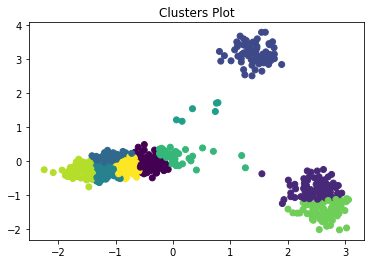

In [ ]:
fig = plt.plot(figsize=(50,50))
plt.scatter(df_for_clusters["Feature1"], df_for_clusters["Feature2"], c=df_for_clusters['Labels'])
plt.title("Clusters Plot")
plt.show()